<a href="https://colab.research.google.com/github/Namit-Joshi/Malaria-Prediction-in-North-India/blob/master/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df= pd.read_csv(io.BytesIO(uploaded['final_data.csv']))

Saving final_data.csv to final_data (1).csv


In [ ]:
df

,Year,Month,PV
0,2013,1,1
1,2013,2,0
2,2013,3,0
3,2013,4,0
4,2013,5,5
5,2013,6,19
6,2013,7,28
7,2013,8,27
8,2013,9,17
9,2013,10,9


In [ ]:
gp = df.groupby(["Month"])["PV"].sum()
gp

Month
1       4
2       2
3       5
4      14
5      30
6      84
7     107
8     180
9     135
10     46
11     17
12     11
Name: PV, dtype: int64

In [ ]:
df['mnth_sin'] = np.sin((df.Month-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.Month-1)*(2.*np.pi/12))

In [ ]:
df.head()

,Year,Month,PV,mnth_sin,mnth_cos
0,2013,1,1,0.000000,1.000000e+00
1,2013,2,0,0.500000,8.660254e-01
2,2013,3,0,0.866025,5.000000e-01
3,2013,4,0,1.000000,6.123234e-17
4,2013,5,5,0.866025,-5.000000e-01


In [ ]:
X = df[['mnth_sin','mnth_cos']]
y = df[['PV']]

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=34)

X_train = df[['mnth_sin','mnth_cos']][:int(0.85*(len(X)))]
y_train = df[['PV']][:int(0.85*(len(y)))]

X_test = df[['mnth_sin','mnth_cos']][int(0.85*(len(X))):]
y_test = df[['PV']][int(0.85*(len(y))):]

In [ ]:
# X_train
# X_test
# print(y_train)
# print(y_test)

,mnth_sin,mnth_cos
51,1.000000e+00,6.123234e-17
52,8.660254e-01,-5.000000e-01
53,5.000000e-01,-8.660254e-01
54,1.224647e-16,-1.000000e+00
55,-5.000000e-01,-8.660254e-01
56,-8.660254e-01,-5.000000e-01
57,-1.000000e+00,-1.836970e-16
58,-8.660254e-01,5.000000e-01
59,-5.000000e-01,8.660254e-01


<Figure size 1000x600 with 0 Axes>

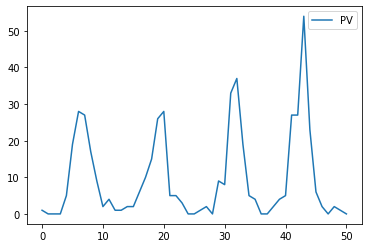

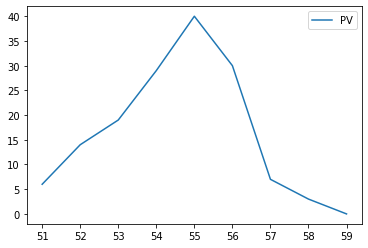

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
y_train.plot()
y_test.plot()

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)
np.reshape(pred1,(9,1))
pred1

array([[ 3.81200909],
       [10.63928778],
       [17.36902658],
       [22.1979974 ],
       [23.83228142],
       [21.83397355],
       [16.73851878],
       [ 9.91124008],
       [ 3.18150129]])

In [ ]:
pred1.shape

(9, 1)

In [ ]:
pred1

array([[ 3.81200909],
       [10.63928778],
       [17.36902658],
       [22.1979974 ],
       [23.83228142],
       [21.83397355],
       [16.73851878],
       [ 9.91124008],
       [ 3.18150129]])

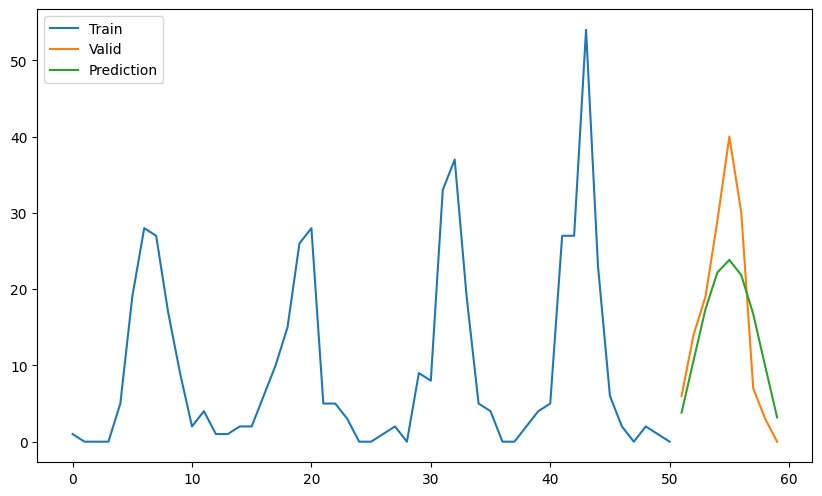

In [ ]:
figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Valid')
x = np.arange(51,60,1)
plt.plot(x,pred1, label='Prediction')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
print("Linear Regression")
from sklearn import metrics
print(metrics.explained_variance_score(y_test, pred1))
print("MAE: ",metrics.mean_absolute_error(y_test,pred1))
print("MSE: ",metrics.mean_squared_error(y_test,pred1))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,pred1)))

Linear Regression
0.6740828458002464
MAE:  6.4607427035609355
MSE:  60.64600605582122
RMSE:  7.787554561980366


In [ ]:
from sklearn import svm
sv=svm.SVC(C=10)

In [ ]:
sv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred2 = sv.predict(X_test)
pred2 = np.reshape(pred2,(9,1))
pred2

array([[ 2],
       [ 5],
       [27],
       [27],
       [27],
       [28],
       [ 5],
       [ 5],
       [ 4]])

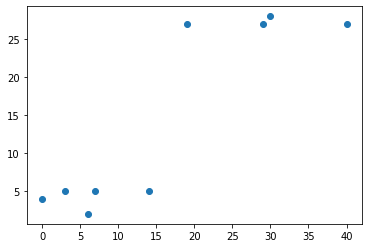

In [ ]:
plt.scatter(y_test,pred2)

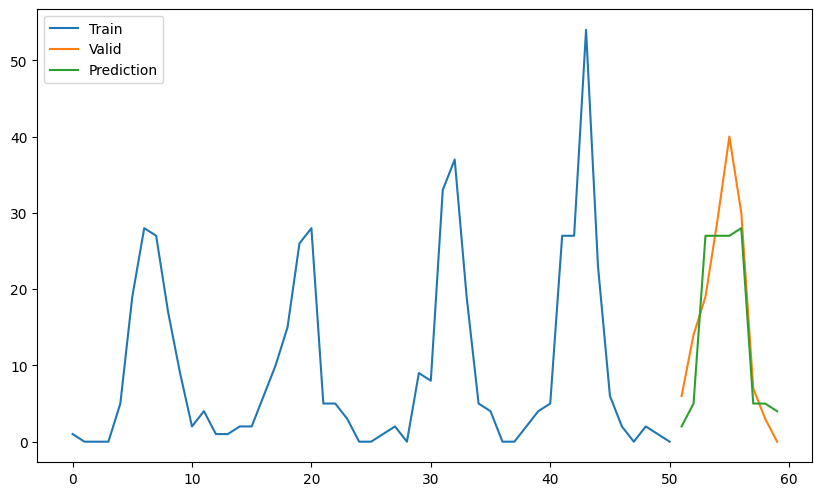

In [ ]:
figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Valid')
x = np.arange(51,60,1)
plt.plot(x,pred2, label='Prediction')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
print("Support Vector Regression")
from sklearn import metrics
print(metrics.explained_variance_score(y_test, pred2))
print("MAE: ",metrics.mean_absolute_error(y_test,pred2))
print("MSE: ",metrics.mean_squared_error(y_test,pred2))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,pred2)))

Support Vector Regression
0.7907872219053051
MAE:  5.111111111111111
MSE:  40.22222222222222
RMSE:  6.342099196813483


In [ ]:
# !pip install pmdarima

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df['PV'])

(0.01, False)

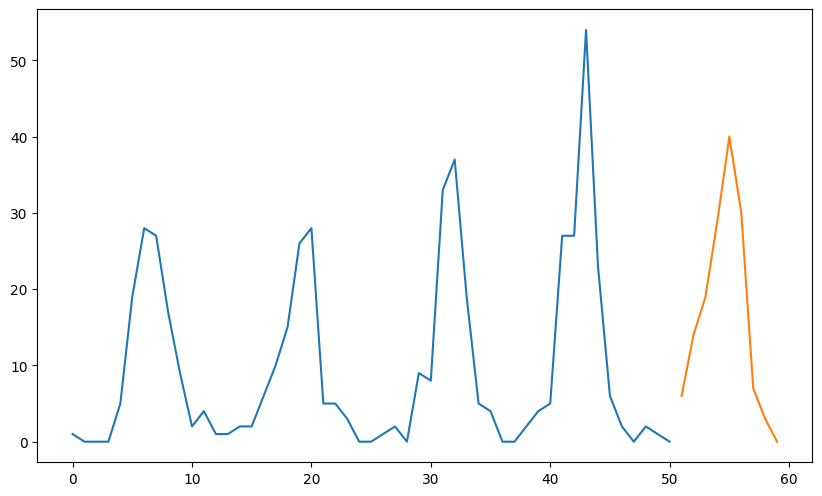

In [ ]:
pv = df['PV']
train = pv[:int(0.85*(len(pv)))]
valid = pv[int(0.85*(len(pv))):]

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
train.plot()
valid.plot()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=272.904, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=275.670, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=270.855, Time=0.26 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=272.054, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=1.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=273.391, Time=0.17 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=274.268, Time=0.17 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=274.568, Time=0.17 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.82 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total fit tim

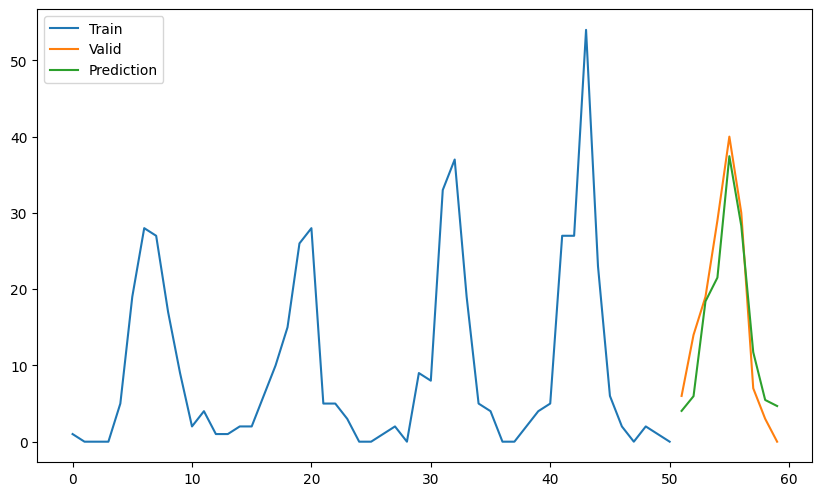

In [ ]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, random_state=20, n_fits=50)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
print("ARIMA")
from sklearn import metrics
print(metrics.explained_variance_score(valid,forecast))
print("MAE: ",metrics.mean_absolute_error(valid,forecast))
print("MSE: ",metrics.mean_squared_error(valid,forecast))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(valid,forecast)))

ARIMA
0.8893007564536913
MAE:  3.8028201246658426
MSE:  20.517232331173307
RMSE:  4.5295951619513755


In [ ]:
pred3 = forecast
np.reshape(pred1,(9,1))
np.reshape(pred2,(9,1))
# print(pred1.shape)
# print(pred2.shape)
# pred3.shape


print(valid)
print(y_test)
print(pred1)
print(pred2)
print(pred3)

51     6
52    14
53    19
54    29
55    40
56    30
57     7
58     3
59     0
Name: PV, dtype: int64
    PV
51   6
52  14
53  19
54  29
55  40
56  30
57   7
58   3
59   0
[[ 3.81200909]
 [10.63928778]
 [17.36902658]
 [22.1979974 ]
 [23.83228142]
 [21.83397355]
 [16.73851878]
 [ 9.91124008]
 [ 3.18150129]]
[[ 2]
 [ 5]
 [27]
 [27]
 [27]
 [28]
 [ 5]
 [ 5]
 [ 4]]
    Prediction
51    4.038787
52    5.966028
53   18.402180
54   21.513217
55   37.437538
56   28.298651
57   11.735396
58    5.469896
59    4.676489


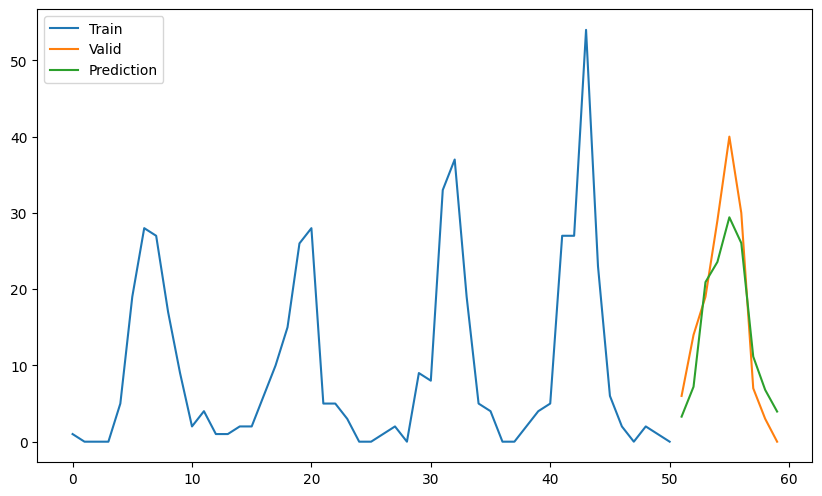

Simple Average
0.8495804929230325
MAE:  4.811647335452792
MSE:  29.0662190617841
RMSE:  5.391309586898539


In [ ]:
avg = (pred1 + pred2 + pred3)/3

figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Valid')
x = np.arange(51,60,1)
plt.plot(x,avg, label='Prediction')
plt.legend(loc = 'upper left')
plt.show()

print("Simple Average")
from sklearn import metrics
print(metrics.explained_variance_score(y_test, avg))
print("MAE: ",metrics.mean_absolute_error(y_test,avg))
print("MSE: ",metrics.mean_squared_error(y_test,avg))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,avg)))

Weighted Average


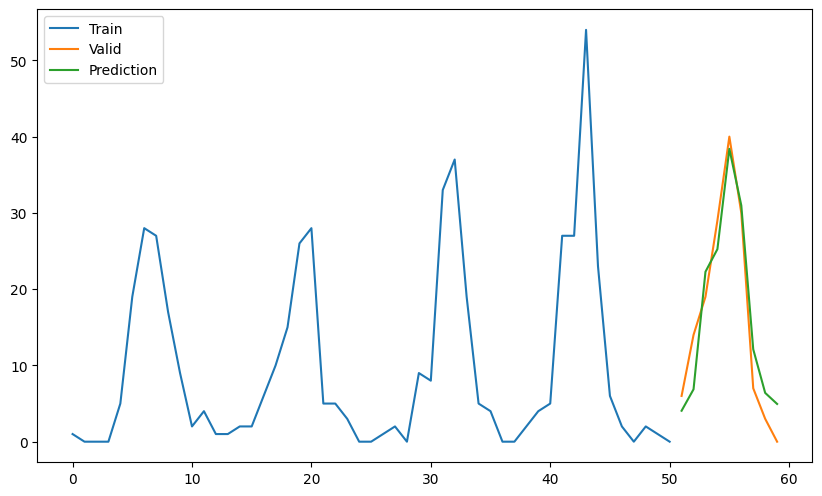

0.9075952303441213
MAE:  3.5712000404740536
MSE:  16.13268075612159
RMSE:  4.016550853172606


In [ ]:
print("Weighted Average")

weighted_avg = (0.08746057777609839*pred1 + 0.21219053736118576*pred2 +  0.8171080352217649*pred3)

figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Valid')
x = np.arange(51,60,1)
plt.plot(x,weighted_avg, label='Prediction')
plt.legend(loc = 'upper left')
plt.show()

print(metrics.explained_variance_score(y_test, weighted_avg))
print("MAE: ",metrics.mean_absolute_error(y_test,weighted_avg))
print("MSE: ",metrics.mean_squared_error(y_test,weighted_avg))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,weighted_avg)))

In [ ]:
weighted_avg = (pred1 + pred2 + pred3)/3
import random
print("Weighted Average")
while(np.sqrt(metrics.mean_squared_error(y_test,weighted_avg))>4.02):
  a = random.random()
  b = random.random()
  c = random.random()
  weighted_avg = (a*pred1 + b*pred2 + c*pred3)

  if(np.sqrt(metrics.mean_squared_error(y_test,weighted_avg))<4.02):
     break

print(a, " " ,b , " " ,c)

print(metrics.explained_variance_score(y_test, weighted_avg))
print("MAE: ",metrics.mean_absolute_error(y_test,weighted_avg))
print("MSE: ",metrics.mean_squared_error(y_test,weighted_avg))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,weighted_avg)))

Weighted Average
0.08746057777609839   0.21219053736118576   0.8171080352217649
0.9075952303441213
MAE:  3.5712000404740536
MSE:  16.13268075612159
RMSE:  4.016550853172606
